# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, November 15, 2021 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

### BEGIN SOLUTION

This is a binary classification problem. The task is to predict whether a credit card client will default or not. The dataset is of moderate size. The number of features is rather small. I would consider this as a small dimensional problem. All features are numerically encoded. That said, some features such as sex and marriage seem more like categorical features. 

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")

### END SOLUTION

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

### BEGIN SOLUTION

In [3]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.shape

(21000, 25)

### END SOLUTION

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

### BEGIN SOLUTION

In [4]:
print("n=%d, d=%d" % train_df.shape)
train_df.describe()

n=21000, d=25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

Seems like there are no missing values and all the columns are encoded as numeric columns. 

In [6]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64


We have a class imbalance. Both classes seem importance here and I am going to pick macro-average f1 score as our evaluation metric. 

In [7]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

In [8]:
np.max(train_df, axis=0)

ID                              30000.0
LIMIT_BAL                     1000000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      964511.0
BILL_AMT2                      983931.0
BILL_AMT3                      855086.0
BILL_AMT4                      891586.0
BILL_AMT5                      927171.0
BILL_AMT6                      961664.0
PAY_AMT1                       873552.0
PAY_AMT2                      1227082.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [9]:
np.min(train_df, axis=0)

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                     -15308.0
BILL_AMT2                     -67526.0
BILL_AMT3                    -157264.0
BILL_AMT4                     -50616.0
BILL_AMT5                     -61372.0
BILL_AMT6                    -339603.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
dtype: float64

In [10]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)

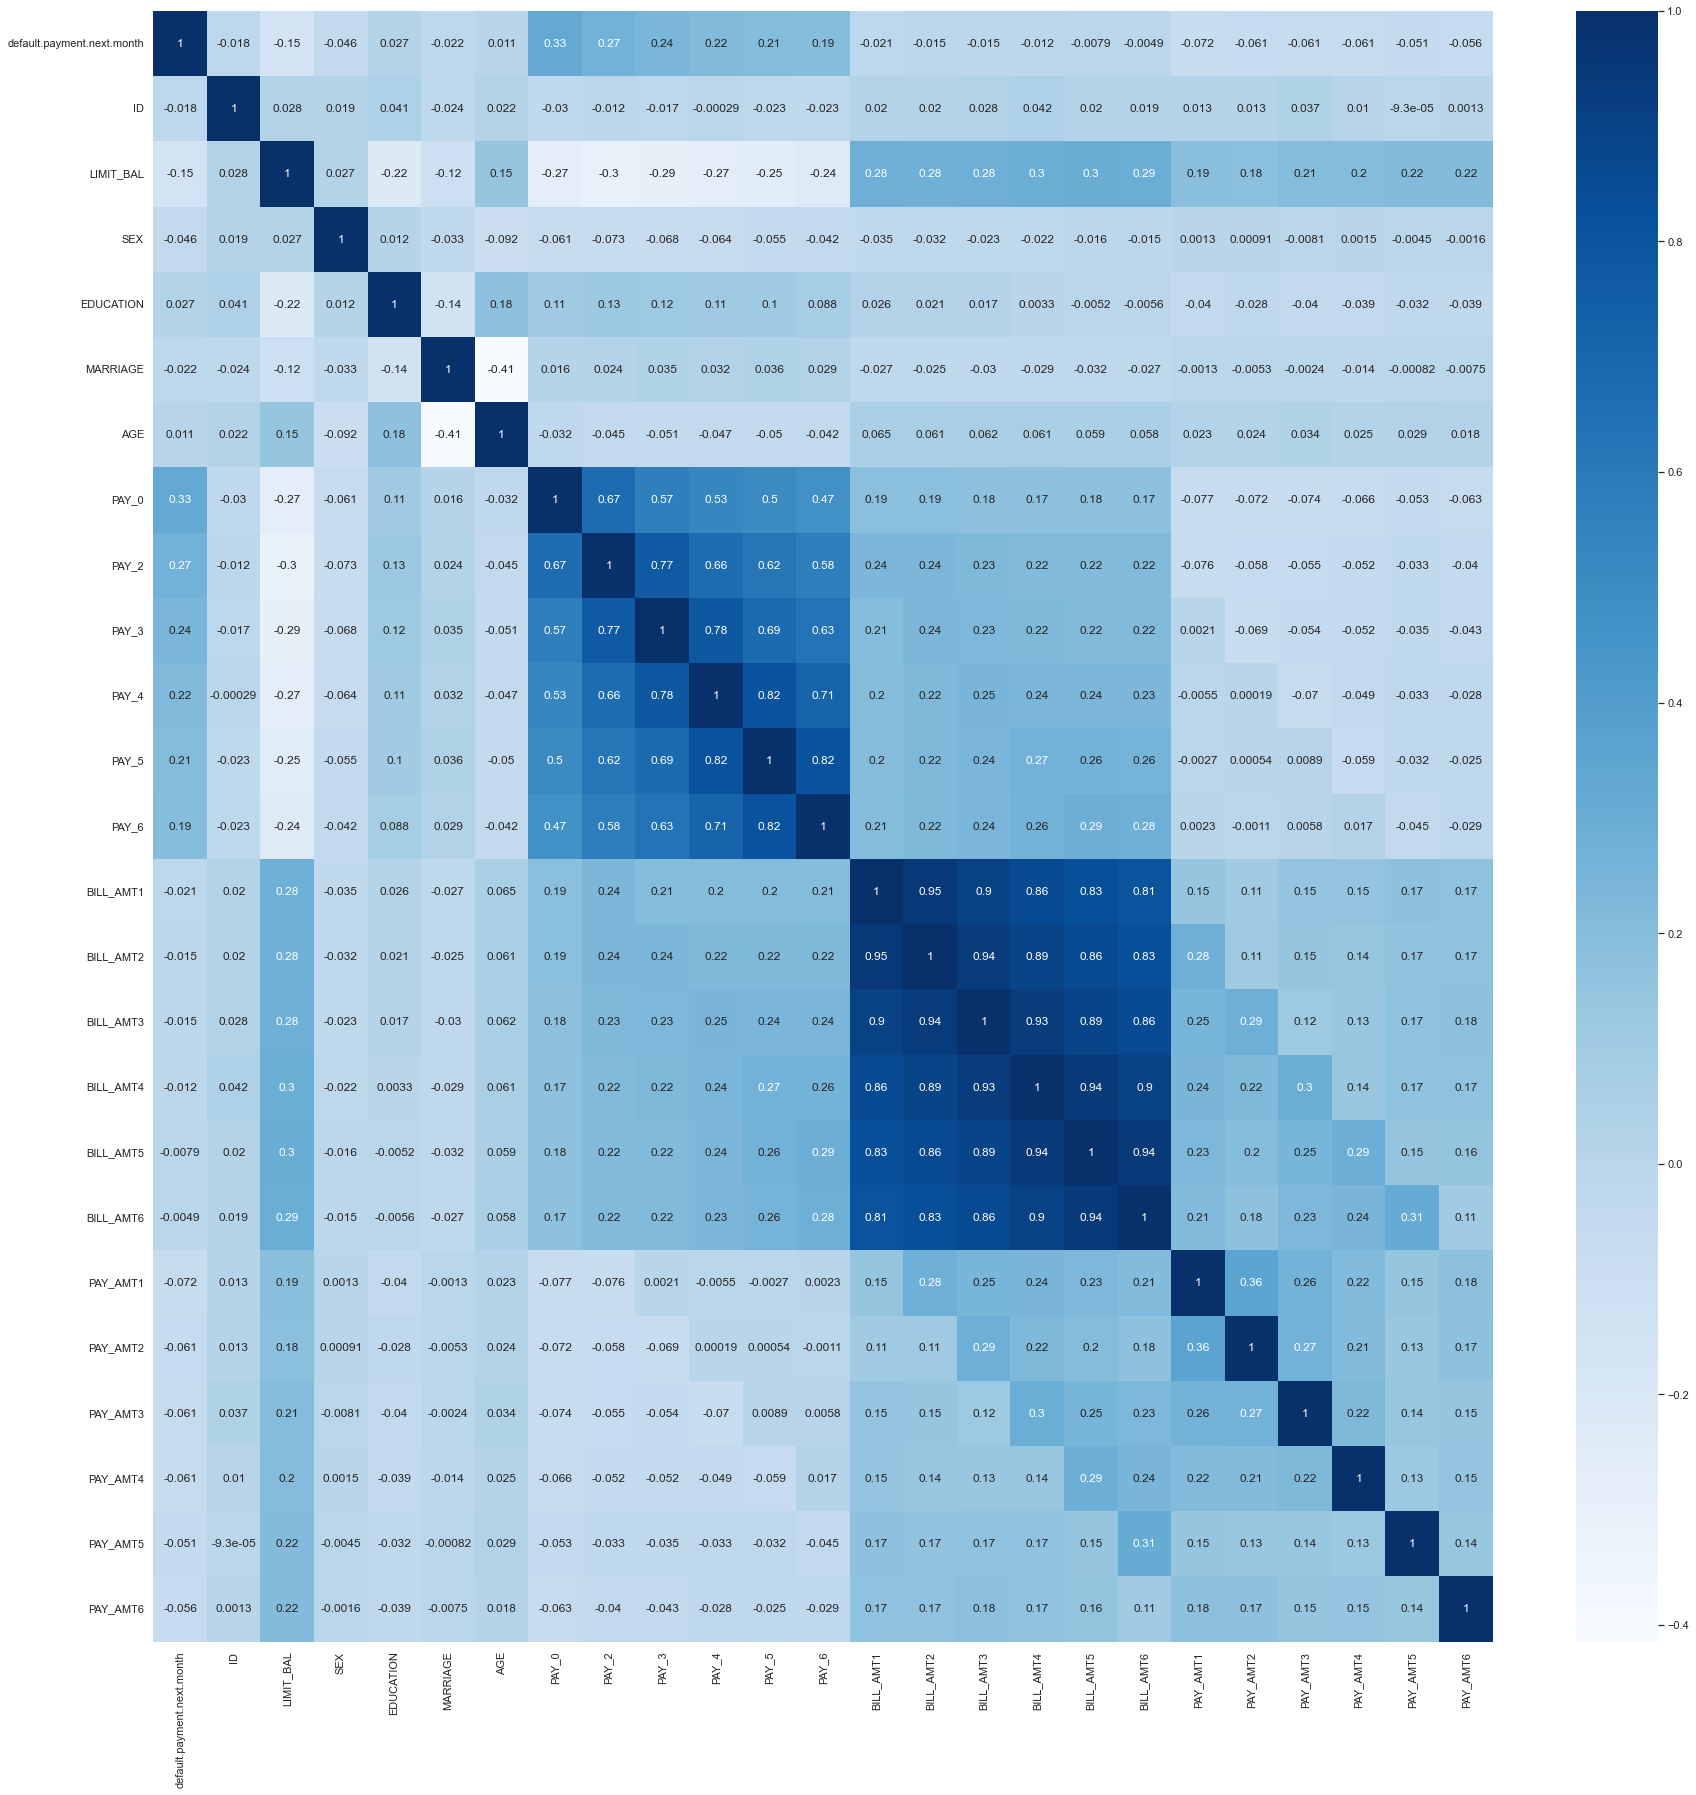

In [11]:
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

Seems like all `PAY_\d*` features and `BILL_AMT\d*` features are highly correlated. 

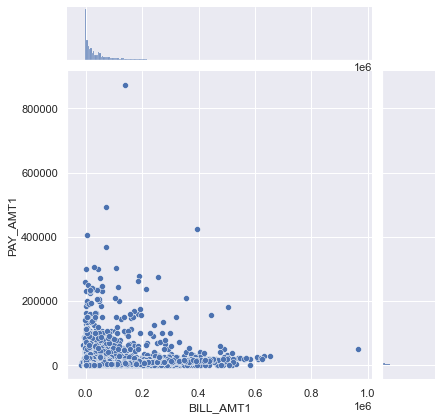

In [12]:
sns.jointplot(x="BILL_AMT1", y="PAY_AMT1", data=train_df)

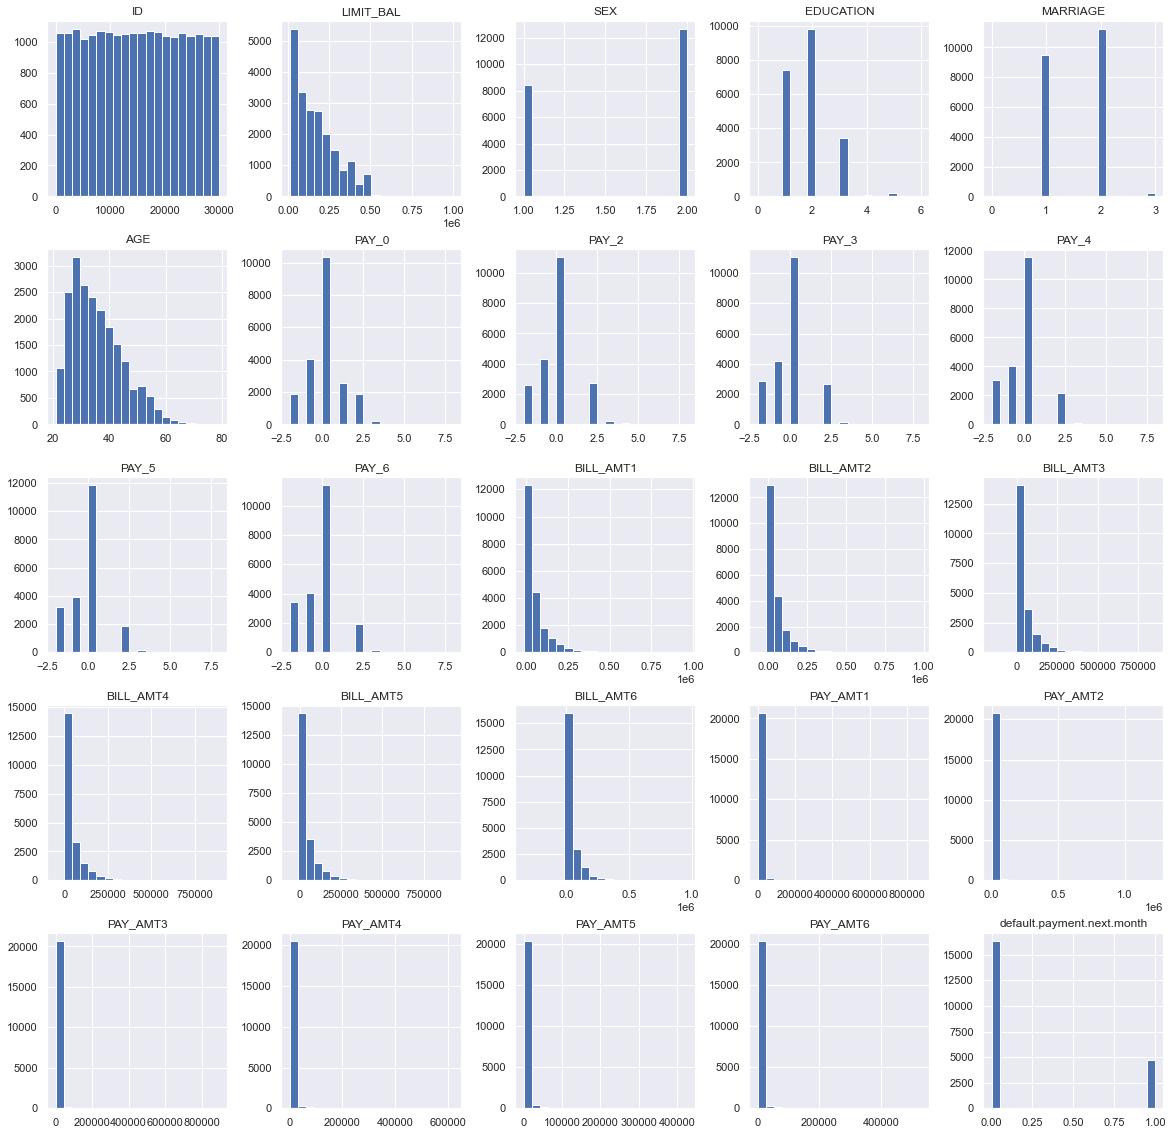

In [13]:
train_df.hist(figsize=(20, 20), bins=20);

We see quite a few outliers for features such as `EDUCATION`, `MARRIAGE`, and `PAY_\d*` features. 

Some initial observations:
    
- We have very few features.
- We have class imbalance and we need to deal with it. We have chosen macro average f1 as our metric where both classes get equal weight. 
- The feature ranges are very different, so we'll need to standardize. 
- We have a number of collinear features.
- We have quite a few outliers. 
- The data is messy / doesn't always correspond to the data description. 
  - What are education levels 5 and 6?
  - What does it mean for PAY_* to be -2? Or 0?

### END SOLUTION

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

### BEGIN SOLUTION
# TODO 
### END SOLUTION

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

### BEGIN SOLUTION

In [14]:
# Let's identify numeric and categorical features
drop_features = ["ID"]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"

In [15]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)

In [16]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [17]:
results = {}

### END SOLUTION

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

### BEGIN SOLUTION

In [18]:
dummy = DummyClassifier(strategy="stratified")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy
fit_time,0.002 (+/- 0.000)
score_time,0.002 (+/- 0.000)
test_score,0.502 (+/- 0.009)
train_score,0.499 (+/- 0.002)


### END SOLUTION

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

### BEGIN SOLUTION

In [19]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy,logreg
fit_time,0.002 (+/- 0.000),0.198 (+/- 0.018)
score_time,0.002 (+/- 0.000),0.007 (+/- 0.000)
test_score,0.502 (+/- 0.009),0.625 (+/- 0.006)
train_score,0.499 (+/- 0.002),0.628 (+/- 0.003)


In [20]:
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [21]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'logisticregression__C': 0.011290431413903904}
Best score: 0.629


,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.630049,0.629036,0.01129,0.055091,0.005759
2,0.630119,0.628820,0.012444,0.058360,0.005739
3,0.629757,0.628285,0.00494,0.044886,0.006232
4,0.630345,0.628241,0.022967,0.069646,0.006073
5,0.630344,0.628159,0.02342,0.066587,0.005999
6,0.629813,0.627771,0.00357,0.042088,0.005548
7,0.629775,0.627648,0.031822,0.076587,0.005572
8,0.629114,0.627397,0.002281,0.040677,0.005280
9,0.629114,0.627311,0.057847,0.087475,0.005274


In [22]:
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002)
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003)
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003)


- Logistic regression scores are better than the dummy classifier scores. 
- Optimizing the regularization hyperparameter of logistic regression improved the validation scores slightly (from 0.625 to 0.629) but not by much. 
- In both cases it seems like we are underfitting; there is not much gap between train and validation scores. Probably non-linear models might be a better choice here. 

### END SOLUTION

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

### BEGIN SOLUTION

In [23]:
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio

3.4795221843003414

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    # "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002)
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003)
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,7.181 (+/- 0.102),4.006 (+/- 0.080),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.345 (+/- 0.032),0.065 (+/- 0.001),0.668 (+/- 0.003),0.999 (+/- 0.000)
lgbm,0.232 (+/- 0.132),0.011 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)


- I am using four non-linear models here: RBF SVM and three tree-based models. 
- We are trying all models with default hyperparameters. 
- Similar to logistic regression, SVC also seems to underfit; the gap between train and test scores are not large. Also, as expected, it takes longer to `fit` compared to other models. Let's abandon it. 
- LGBM seems to be the best performing model among the tree-based models. It also seems to be much faster and overfitting less compared to random forest and xgboost. That said, it's std is higher than the other two models. 

In [25]:
del models["RBF SVM"]

### END SOLUTION

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

### BEGIN SOLUTION

TBD

### END SOLUTION

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

### BEGIN SOLUTION

#### Random forest hyperparameter optimization 

In [26]:
param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(low=10, high=100),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

pipe_random_forest = make_pipeline(preprocessor, models["random forest"])

In [27]:
random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_grid_rf,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_rf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [28]:
print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'randomforestclassifier__max_depth': 11, 'randomforestclassifier__n_estimators': 62}
Best score: 0.706


,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,,
1,0.792021,0.705589,62,11,0.992416,0.010398
2,0.815615,0.704876,79,12,1.331169,0.008913
3,0.814653,0.703748,67,12,1.156731,0.009522
4,0.706073,0.703600,86,4,0.630720,0.009061
5,0.706940,0.703481,27,4,0.217540,0.008128
6,0.768482,0.703388,35,10,0.556789,0.009720
7,0.752798,0.703367,76,9,1.040315,0.008657
8,0.705913,0.702910,68,4,0.501786,0.009073
9,0.839467,0.702758,68,13,1.209428,0.008306


In [29]:
best_rf_model = random_search_rf.best_estimator_
results["random forest (tuned)"] = mean_std_cross_val_scores(
    best_rf_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002)
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003)
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,7.181 (+/- 0.102),4.006 (+/- 0.080),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.345 (+/- 0.032),0.065 (+/- 0.001),0.668 (+/- 0.003),0.999 (+/- 0.000)
lgbm,0.232 (+/- 0.132),0.011 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest (tuned),0.986 (+/- 0.008),0.028 (+/- 0.000),0.706 (+/- 0.012),0.792 (+/- 0.002)


#### LGBM hyperparameter optimization 

In [30]:
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)

In [31]:
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [32]:
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 13, 'lgbmclassifier__subsample': 0.5}
Best score: 0.707


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__subsample,mean_fit_time
rank_test_score,,,,,,
1,0.718904,0.706997,13,0.1,0.5,0.048637
2,0.719469,0.706529,11,0.1,0.5,0.045916
2,0.719469,0.706529,11,0.1,1,0.046876
4,0.721328,0.704935,17,0.1,1,0.050755
5,0.710473,0.701874,94,0.01,0.5,0.115187
6,0.722566,0.698224,22,0.1,1,0.054224
7,0.723291,0.697680,24,0.1,1,0.055911
8,0.702752,0.695554,86,0.01,0.5,0.111971
9,0.728293,0.691679,35,0.1,1,0.064315


In [33]:
best_lgbm_model = random_search_lgbm.best_estimator_
results["lgbm (tuned)"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002)
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003)
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,7.181 (+/- 0.102),4.006 (+/- 0.080),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.345 (+/- 0.032),0.065 (+/- 0.001),0.668 (+/- 0.003),0.999 (+/- 0.000)
lgbm,0.232 (+/- 0.132),0.011 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest (tuned),0.986 (+/- 0.008),0.028 (+/- 0.000),0.706 (+/- 0.012),0.792 (+/- 0.002)
lgbm (tuned),0.051 (+/- 0.005),0.009 (+/- 0.000),0.707 (+/- 0.009),0.719 (+/- 0.003)


**Summary of observations**

Hyperparameter optimization seems to help with random forests as well as LightGBM. The scores for both models seem very similar. But we pick LightGBM because
- it seems to be less overfitting 
- it's much faster
- the standard deviation is smaller compared to random forest. 

### END SOLUTION

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

### BEGIN SOLUTION

In [34]:
import eli5

binary_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names(binary_features)
)

categorical_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names(categorical_features)
)

feature_names = numeric_features + binary_OHE + categorical_OHE

eli5.show_weights(
    best_lgbm_model.named_steps["lgbmclassifier"],
    feature_names=feature_names,
)

Weight,Feature
0.5927,PAY_0
0.0585,PAY_AMT2
0.0431,LIMIT_BAL
0.0417,BILL_AMT1
0.0278,PAY_4
0.0277,PAY_2
0.0275,PAY_3
0.0259,PAY_AMT3
0.0226,PAY_AMT4
0.0195,PAY_AMT1


In [35]:
import shap

preprocessor.fit(X_train, y_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_train_enc.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
16395,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,-0.265310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21448,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,0.585444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20034,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,-0.681234,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,0.835581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,-0.287429,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
lgbm_tuned = LGBMClassifier(
    scale_pos_weight=ratio,
    random_state=2,
    learning_rate=random_search_lgbm.best_params_["lgbmclassifier__learning_rate"],
    n_estimators=random_search_lgbm.best_params_["lgbmclassifier__n_estimators"],
    subsample=random_search_lgbm.best_params_["lgbmclassifier__subsample"],
)

lgbm_tuned.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_tuned)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [37]:
values = np.abs(lgbm_shap_values[0]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
PAY_0,0.379010
LIMIT_BAL,0.129931
PAY_AMT2,0.093941
BILL_AMT1,0.086548
PAY_AMT3,0.059370
PAY_2,0.051485
PAY_3,0.050122
PAY_AMT1,0.044178
PAY_AMT4,0.043867
PAY_4,0.039639


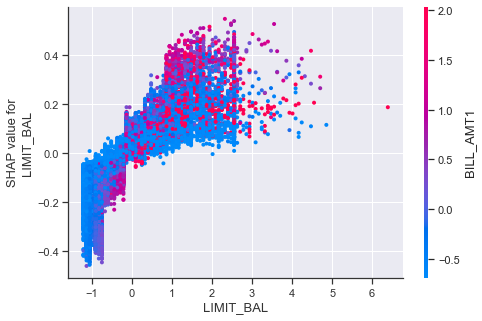

In [38]:
shap.dependence_plot("LIMIT_BAL", lgbm_shap_values[0], X_train_enc)

As `LIMIT_BAL` increases, SHAP values for class 0 increase as well, suggesting that class is likely to be 0 (non default) with higher values for LIMIT_BAL, which makes sense.    

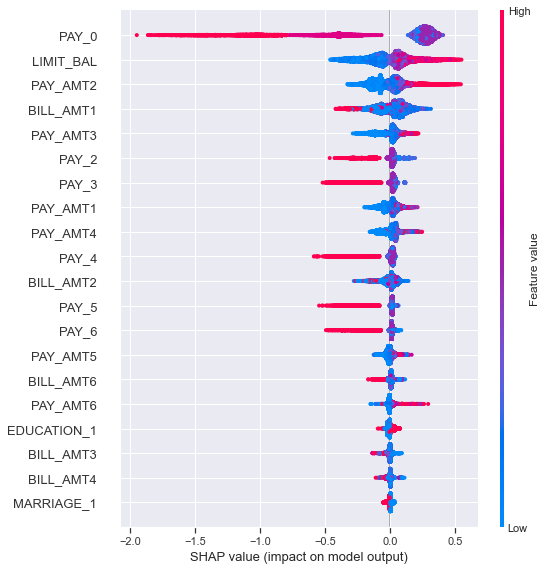

In [39]:
shap.summary_plot(lgbm_shap_values[0], X_train_enc)

In [40]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [41]:
lgbm_tuned.predict_proba(X_test_enc)[1]

array([0.74058038, 0.25941962])

In [42]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[1]

-1.0489872894312522

In [43]:
lgbm_explainer.expected_value

[0.5594117098974121, -0.5594117098974121]

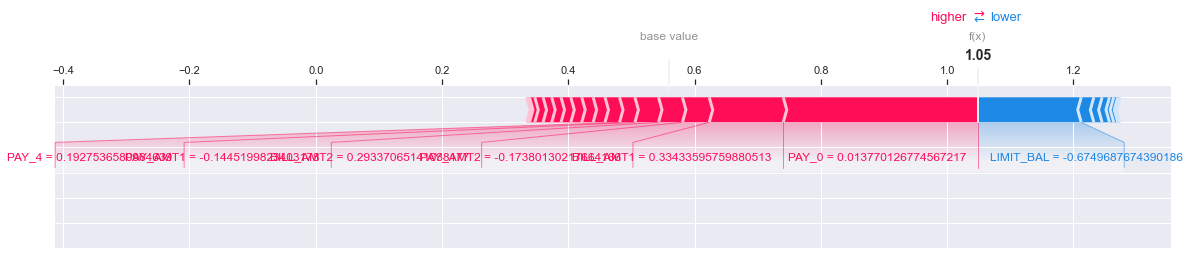

In [44]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)

**Summary of observations**
- From the analysis above we observe that **PAY_\d{0,2,3,4}**, **PAY_AMT**, **LIM_BAL** features seem to be one of the most important features with `PAY_0` being the topmost feature. 
- The SHAP dependence plot demonstrates that the class is likely to be 0 (non default) for higher values for LIMIT_BAL, which makes sense.
- The features `EDUCATION` and `SEX` doesn't seem to influence the prediction much. This might be because of the noise in the `EDUCTION` column; there are a number of unknown values in this column.  


### END SOLUTION

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

### BEGIN SOLUTION

In [45]:
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Grid Search best model validation score: 0.707
Macro-average f1 score on the test set: 0.695


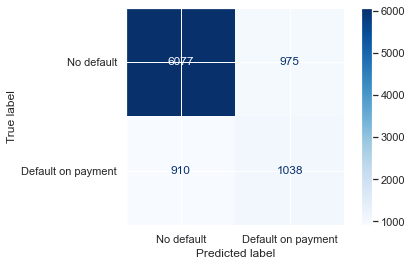

In [46]:
from sklearn.metrics import classification_report

plot_confusion_matrix(
    best_model,
    X_test,
    y_test,
    display_labels=["No default", "Default on payment"],
    values_format="d",
    cmap=plt.cm.Blues,
)

In [47]:
print(
    classification_report(
        y_test, predictions, target_names=["No default", "Default on payment"]
    )
)

                    precision    recall  f1-score   support

        No default       0.87      0.86      0.87      7052
Default on payment       0.52      0.53      0.52      1948

          accuracy                           0.79      9000
         macro avg       0.69      0.70      0.69      9000
      weighted avg       0.79      0.79      0.79      9000



The macro-average f1-score (0.695) on the held-out test set is pretty much in line with the macro-average f1-score validation score (0.707). So there doesn't seem to be severe optimization bias here.

### END SOLUTION

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

### BEGIN SOLUTION

Let's explain a default and a non-default test prediction using SHAP force plot. 
Let's first get indices for default and non-default examples. 

In [48]:
y_test_reset = y_test.reset_index(drop=True)
non_default_ind = y_test_reset[y_test_reset == 0].index.tolist()
default_ind = y_test_reset[y_test_reset == 1].index.tolist()

ex_non_default_index = non_default_ind[0]
ex_default_index = default_ind[0]

**Explanation of a non-default prediction**

In [49]:
lgbm_tuned.predict_proba(X_test_enc)[ex_non_default_index]

array([0.697763, 0.302237])

In [50]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_non_default_index]

-0.8366680315908269

In [51]:
lgbm_explainer.expected_value

[0.5594117098974121, -0.5594117098974121]

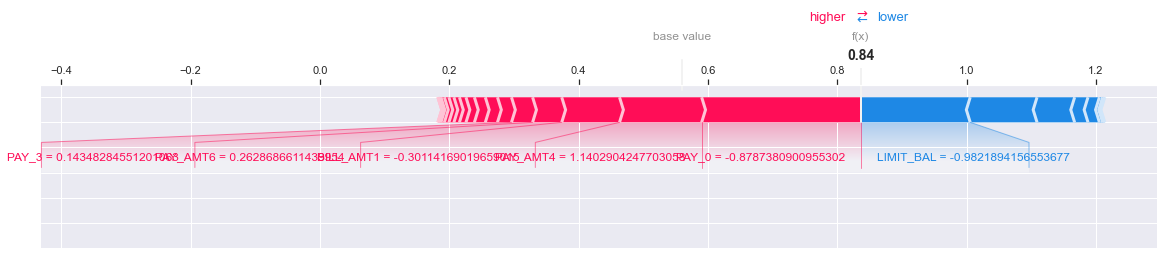

In [52]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][ex_non_default_index, :],
    X_test_enc.iloc[ex_non_default_index, :],
    matplotlib=True,
)

- The raw model score is 0.84, which is greater than the base value 0.5594 and so the prediction is that the user is not likely to default on credit payment (because we are consider the shap values for class 0). 

**Explanation of a default prediction**

In [53]:
lgbm_tuned.predict_proba(X_test_enc)[ex_default_index]

array([0.26909715, 0.73090285])

In [54]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_default_index]

0.9992080664830868

In [55]:
lgbm_explainer.expected_value

[0.5594117098974121, -0.5594117098974121]

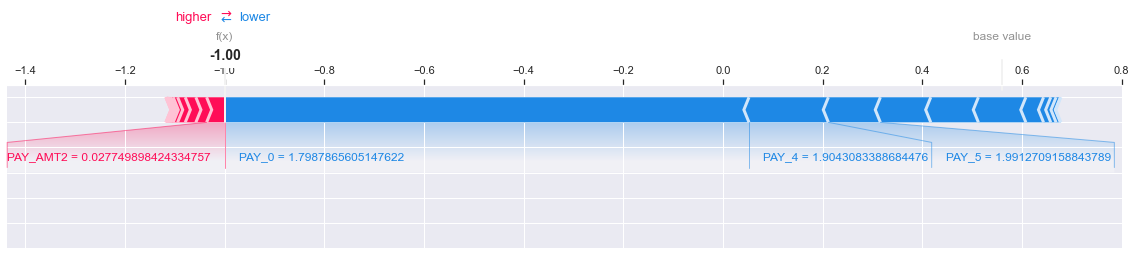

In [56]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][ex_default_index, :],
    X_test_enc.iloc[ex_default_index, :],
    matplotlib=True,
)

- The raw model score is -1.00, which is smaller than the base value 0.5594 and so the prediction is that the user is likely to default on the credit payment (class 1). 
- Positive values for PAY_* variables seem to push the prediction towards a lower value. 

### END SOLUTION

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

### BEGIN SOLUTION

In [65]:
pd.DataFrame(results).T
summary_df = pd.DataFrame(results).T
summary_df

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002)
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003)
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,7.181 (+/- 0.102),4.006 (+/- 0.080),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.345 (+/- 0.032),0.065 (+/- 0.001),0.668 (+/- 0.003),0.999 (+/- 0.000)
lgbm,0.232 (+/- 0.132),0.011 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest (tuned),0.986 (+/- 0.008),0.028 (+/- 0.000),0.706 (+/- 0.012),0.792 (+/- 0.002)
lgbm (tuned),0.051 (+/- 0.005),0.009 (+/- 0.000),0.707 (+/- 0.009),0.719 (+/- 0.003)


In [66]:
comments = {
    "dummy": "Baseline of 0.50 macro-average f1 score.",
    "logreg": "Improvement over the baseline but underfitting.",
    "logreg (tuned)": "Slight improvement but still underfitting.",
    "RBF SVM": "Improvement over tuned logistic regression but slow.",
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    #"xgboost": "Best results so far and less overfitting compared to random forest.",
    "lgbm": "Improvement over xgboost and less overfitting.",
    #"random forest+ feat_sel": "Feature selection with L1 regularization helps a tiny bit. Selects 29 features.",
    #"xgboost+ feat_sel": "Very tiny improvement with L1 feature selection.",
    #"lgbm+ feat_sel": "No improvemnt with L1 feature selection.",
    "random forest (tuned)": "Hyperparameter optimization helped! Best results so far.",
    "lgbm (tuned)": "Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df

,fit_time,score_time,test_score,train_score,comments
dummy,0.002 (+/- 0.000),0.002 (+/- 0.000),0.502 (+/- 0.009),0.499 (+/- 0.002),Baseline of 0.50 macro-average f1 score.
logreg,0.198 (+/- 0.018),0.007 (+/- 0.000),0.625 (+/- 0.006),0.628 (+/- 0.003),Improvement over the baseline but underfitting.
logreg (tuned),0.055 (+/- 0.002),0.008 (+/- 0.002),0.629 (+/- 0.006),0.630 (+/- 0.003),Slight improvement but still underfitting.
RBF SVM,7.181 (+/- 0.102),4.006 (+/- 0.080),0.675 (+/- 0.008),0.686 (+/- 0.002),Improvement over tuned logistic regression but slow.
random forest,2.345 (+/- 0.032),0.065 (+/- 0.001),0.668 (+/- 0.003),0.999 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
lgbm,0.232 (+/- 0.132),0.011 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004),Improvement over xgboost and less overfitting.
random forest (tuned),0.986 (+/- 0.008),0.028 (+/- 0.000),0.706 (+/- 0.012),0.792 (+/- 0.002),Hyperparameter optimization helped! Best results so far.
lgbm (tuned),0.051 (+/- 0.005),0.009 (+/- 0.000),0.707 (+/- 0.009),0.719 (+/- 0.003),Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.


#### Concluding remarks

All our models beat the baseline. Our best model was LightGBM classifier with tuned hyperparameters. It achieved cross-validation macro-average f1 score of 0.707. The scores do not seem to overfit much; the gap between mean train score (0.719) and mean cross-validation score (0.707) is not big. These scores are very similar to the tuned random forest. But random forest seems to overfit. Also, it's much slower than LightGBM. So picked LightGBM model as our final model.  

We observed the macro-average f1 score of 0.695 using this model on the held out test set, which is in line with mean cross-validation macro-average f1-score (0.707). So there doesn't seem to be severe optimization bias here.

We observed that L1 feature selection helped a tiny bit for random forests. But we did not observe any improvement in LightGBM scores with feature selection in the pipeline. In general, we have small number of features in this problem and feature selection doesn't seem crucial. 

Our analysis of feature importances shows that our `PAY_\d{0,2}`, `LIMIT_*`, and `PAY_AMT*` variables seems to be most important features. Although `SEX` feature doesn't show up as one of the most important features, depending upon the context it might be a good idea to drop this feature from our analysis. 

#### Other ideas
    
- Preprocessing and feature engineering     
    - The `BILL_AMT*` and `PAY_AMT*` variables are the bill amount, and amount paid, respectively. We could try making new features by subtracting or otherwise combining these, which would be the amount you paid relative to the amount owed.
    - There are a number of collinear features in the dataset, especially, our `PAY_\d{0,5}` features, which are one of the topmost important features. We could create new features by combining these features.     
    - More data cleaning would probably help. 
    - In my opinion, data cleaning and feature engineering are very important here.
    
- More careful hyperparameter optimization 
    - Because of limited time, we did not carry out extensive hyperparameter optimization. For instance, we didn't carry out hyperparameter optimization with the XGBoost model. It might be worth exploring this area a bit more.  

### END SOLUTION

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 